# 機械学習体験 - 教師あり学習 - 分類問題 - トレーニング

## トレーニング1 - irisデータの分析

### 1.1 sklearnの load_iris 関数を使って iris データを読み込みます。 

In [1]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
print(iris.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


> 変数 `iris` には 'data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename' といったプロパティが存在します。

### 1.2 変数 `iris` の `data` プロパティの形状（ `shape` ）を出力してください。

In [2]:
iris.data.shape

(150, 4)

### 1.3 変数 `iris` の `target` プロパティの形状（ `shape` ）を出力してください。

In [3]:
iris.target.shape

(150,)

### 1.4 変数 `iris` の `feature_names` プロパティを出力してください。

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

### 1.5 pandasのDataFrameで iris.data を表示してください。

> DataFrameを代入する変数名は `iris_df` とします。 またDataFrameの列名には `iris.feature_names` の値を出力するものとします。

In [5]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### 1.6 DataFrame(iris_df) に `class` 列を追加します。`class` 列には `iris.target` の値を表示するものとします。


In [6]:
iris_df["class"] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### 1.7 DataFrame(iris_df) の各列の概要を出力してください。

In [7]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### 1.8 DataFrame(iris_df) の `sepal length (cm)` についてヒストグラムを出力してください。

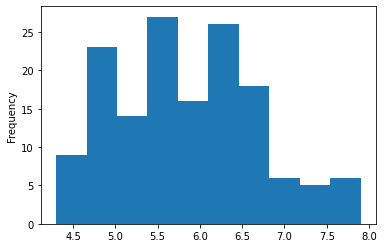

In [8]:
iris_df["sepal length (cm)"].plot.hist()

### 1.9 DataFrame(iris_df) の `sepal width (cm)` についてヒストグラムを出力してください。

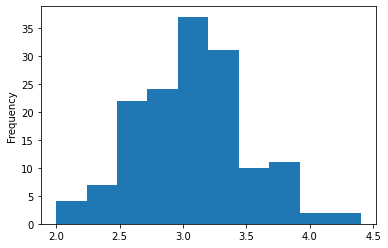

In [9]:
iris_df["sepal width (cm)"].plot.hist()

### 1.10 DataFrame(iris_df) の `petal length (cm)` についてヒストグラムを出力してください。

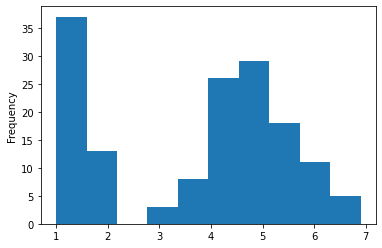

In [10]:
iris_df["petal length (cm)"].plot.hist()

### 1.11 DataFrame(iris_df) の `petal length (cm)` についてヒストグラムを出力してください。

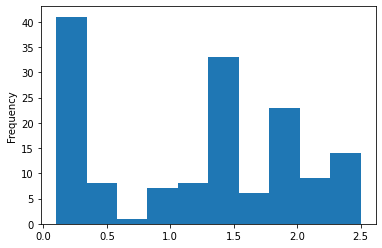

In [11]:
iris_df["petal width (cm)"].plot.hist()

### 1.12 DataFrame(iris_df) の `sepal length (cm)`、 `sepal width (cm)` について散布図を出力してください。

> `class == 0` のデータは赤色、`class == 1` のデータは緑色、`class == 2` のデータは青色で表示するものとします。

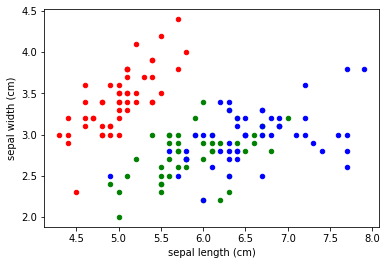

In [12]:
ax = iris_df[iris_df["class"] == 0].plot.scatter("sepal length (cm)", "sepal width (cm)", color="red")
iris_df[iris_df["class"] == 1].plot.scatter("sepal length (cm)", "sepal width (cm)", color="green", ax=ax)
iris_df[iris_df["class"] == 2].plot.scatter("sepal length (cm)", "sepal width (cm)", color="blue", ax=ax)

### 1.13 DataFrame(iris_df) の `petal length (cm)`、 `petal width (cm)` について散布図を出力してください。

> `class == 0` のデータは赤色、`class == 1` のデータは緑色、`class == 2` のデータは青色で表示するものとします。

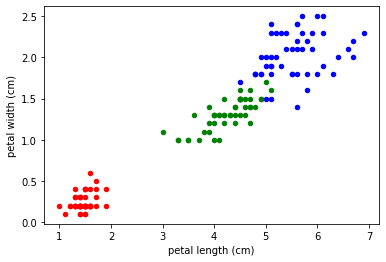

In [13]:
ax = iris_df[iris_df["class"] == 0].plot.scatter("petal length (cm)", "petal width (cm)", color="red")
iris_df[iris_df["class"] == 1].plot.scatter("petal length (cm)", "petal width (cm)", color="green", ax=ax)
iris_df[iris_df["class"] == 2].plot.scatter("petal length (cm)", "petal width (cm)", color="blue", ax=ax)

### （参考） `seaborn` ライブラリを使うと特徴量ごとのヒストグラム、散布図の組み合わせをまとめて出力できます。

> 表示しているサンプルコードを実行してください。

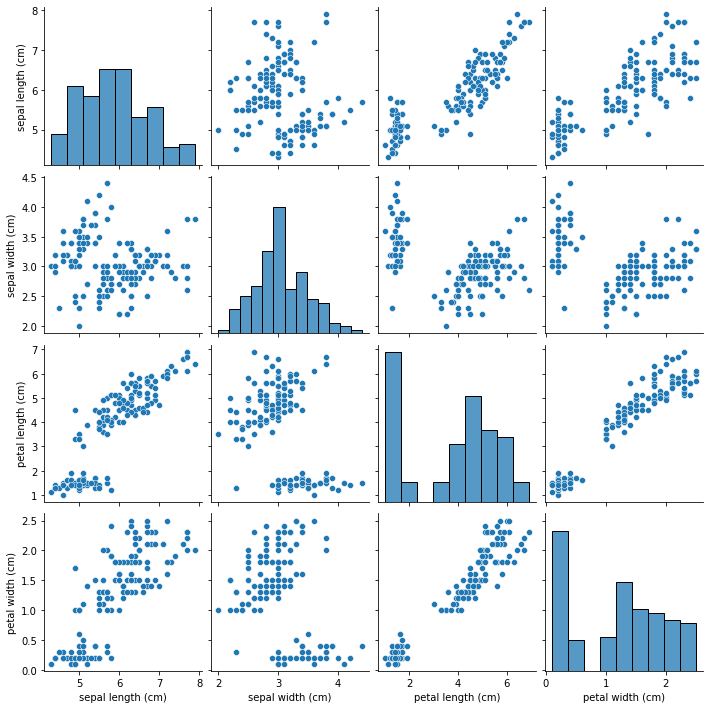

In [14]:
import seaborn as sns

sns.pairplot(iris_df[["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]])

### 1.14 DataFrame(iris_df）のデータを訓練データ75件、テストデータ75件に分割してください。


In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(iris_df[["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]].values, iris_df["class"].values, train_size=0.5, random_state=12)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(75, 4)
(75, 4)
(75,)
(75,)


### 1.15 k-NN法によって、DataFrame（iris_df）の訓練データで学習して、テストデータに対しての正答率（Accuracy）を出力してください。

> k-NN法では最寄りの3点から分類を行うものとします。

In [16]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(x_train, y_train)

clf.score(x_test, y_test)

0.9466666666666667

### 1.16 テストデータと推論値の混同行列（confusion_matrix）を出力してください。

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, clf.predict(x_test))
pd.DataFrame(cm)

,0,1,2
0,29,0,0
1,0,20,3
2,0,1,22


### 1.17 以下のサンプルデータ（ `samples` ）の分類結果を推論してください。

In [18]:
import numpy as np
samples = np.array([
    [4.6, 3.2, 1.5, 0.2],
    [6.1, 3.0, 4.5, 1.4],
    [6.3, 2.5, 5.0, 2.0]
])
print(clf.predict(samples))

[0 1 2]


## トレーニング2 - moon データの分析

### 2.1 wgetコマンド以下のURLからでファイル（moon.csv）をダウンロードしてください。

```
https://gist.githubusercontent.com/murayama333/48659d9a0f95f973f16b58ed895a67be/raw/2f2cfad80a11e240bb491a3b3e79493b20814dcf/moon.csv
```

In [19]:
!wget https://gist.githubusercontent.com/murayama333/48659d9a0f95f973f16b58ed895a67be/raw/2f2cfad80a11e240bb491a3b3e79493b20814dcf/moon.csv

--2021-02-22 14:22:03--  https://gist.githubusercontent.com/murayama333/48659d9a0f95f973f16b58ed895a67be/raw/2f2cfad80a11e240bb491a3b3e79493b20814dcf/moon.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20527 (20K) [text/plain]
Saving to: ‘moon.csv’

moon.csv            100%[===================>]  20.05K  --.-KB/s    in 0.002s  

2021-02-22 14:22:03 (12.5 MB/s) - ‘moon.csv’ saved [20527/20527]



### 2.2 pandasのDataFrameで moon.csv を表示してください。

> DataFrameを代入する変数名は `moon_df` とします。

In [20]:
import pandas as pd

moon_df = pd.read_csv("moon.csv")
moon_df

,f1,f2,label
0,0.409860,0.030967,1
1,0.903431,-0.555821,1
2,0.914180,0.574279,0
3,0.447570,0.520823,0
4,2.109126,0.026856,1
...,...,...,...
495,0.092387,0.259410,1
496,0.847056,0.496086,0
497,1.307602,-0.439706,1
498,-0.968856,0.251093,0


### 2.3 DataFrame（`moon_df`）の `f1` と `f2` の散布図を表示してください。

> ただし、label == 0 のデータは赤色、label == 1 のデータは青色で表示してください。

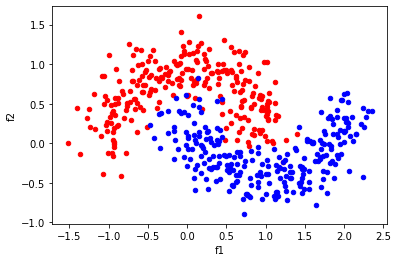

In [21]:
ax = moon_df[moon_df["label"] == 0].plot.scatter("f1", "f2", color="red")
moon_df[moon_df["label"] == 1].plot.scatter("f1", "f2", color="blue", ax=ax)

### 2.4 DataFrame（moon_df）のデータを訓練データ375件、テストデータ125件に分割してください。

In [22]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(moon_df[["f1", "f2"]], moon_df["label"], random_state=1)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(375, 2)
(125, 2)
(375,)
(125,)


### 2.5 ロジスティック回帰によって、DataFrame（moon_df）の訓練データで学習して、テストデータに対しての正答率（Accuracy） を表示してください。

In [23]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(x_train, y_train)
print(clf.score(x_test, y_test))

0.84


### 2.6 mlextend を使って散布図にロジスティック回帰の境界線を描画してください。

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


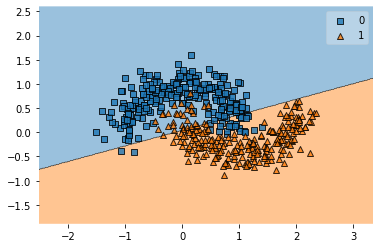

In [24]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(moon_df[["f1", "f2"]].values, moon_df["label"].values, clf=clf)

### 2.7 k-NN法によって、DataFrame（moon_df）の訓練データで学習して、テストデータに対しての正答率（Accuracy） を表示してください。

> k-NN法では最寄りの3点から分類を行うものとします。

In [25]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
clf.fit(x_train, y_train)
print(clf.score(x_test, y_test))

0.96


### 2.8 mlextend を使って散布図にk-NN法の境界線を描画してください。

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


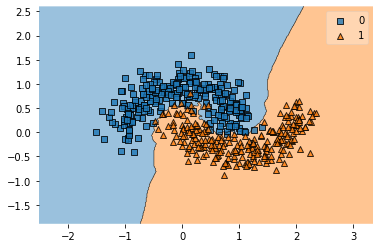

In [26]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(moon_df[["f1", "f2"]].values, moon_df["label"].values, clf=clf)

## （参考） トレーニング3 - circle データの分析

### 3.1 wgetコマンド以下のURLからでファイル（moon.csv）をダウンロードしてください。

```
https://gist.githubusercontent.com/murayama333/226a19aac94e85b94da73e4a7b20fa02/raw/efc5a8b4c45dd43b3a551ddfc3a97a6097f7533a/circle.csv
```

> ロジスティック回帰、k-NN法での分類にチャレンジしてください。

In [27]:
!wget https://gist.githubusercontent.com/murayama333/226a19aac94e85b94da73e4a7b20fa02/raw/efc5a8b4c45dd43b3a551ddfc3a97a6097f7533a/circle.csv

--2021-02-22 14:22:08--  https://gist.githubusercontent.com/murayama333/226a19aac94e85b94da73e4a7b20fa02/raw/efc5a8b4c45dd43b3a551ddfc3a97a6097f7533a/circle.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20679 (20K) [text/plain]
Saving to: ‘circle.csv’

circle.csv          100%[===================>]  20.19K  --.-KB/s    in 0s      

2021-02-22 14:22:08 (43.0 MB/s) - ‘circle.csv’ saved [20679/20679]



In [28]:
import pandas as pd 

df = pd.read_csv("circle.csv")

In [29]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df[["f1", "f2"]], df["label"], random_state=1)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(375, 2)
(125, 2)
(375,)
(125,)


In [30]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

0.416

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


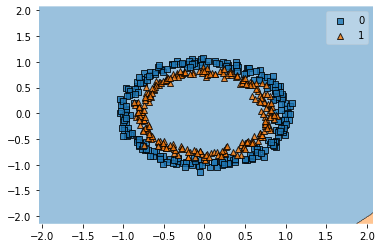

In [31]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(df[["f1", "f2"]].values, df["label"].values, clf=clf)

In [32]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

0.992

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


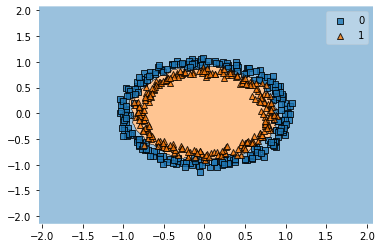

In [33]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(df[["f1", "f2"]].values, df["label"].values, clf=clf)